In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


In [6]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

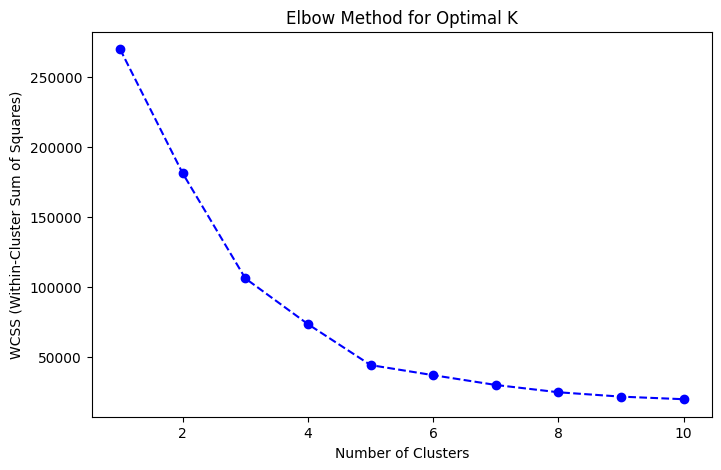

In [9]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [22]:
# Step 2: Apply K-Means with the optimal number of clusters
optimal_clusters = 5  # Based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters)
df['Cluster'] = kmeans.fit_predict(X)


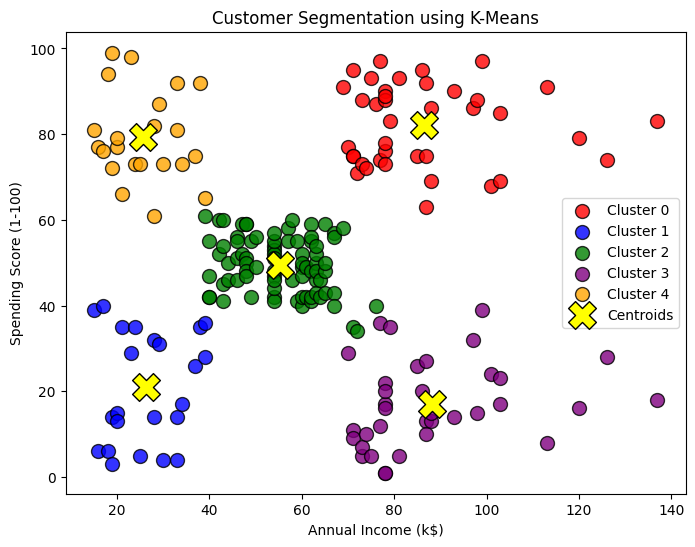

In [28]:
# Step 3: Plot both clusters and centroids in the same graph
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange']  # Colors for clusters

# Plot each cluster
for i in range(optimal_clusters):
    plt.scatter(X[df['Cluster'] == i]['Annual Income (k$)'],
                X[df['Cluster'] == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}', edgecolors='black', alpha=0.8)

# Plot centroids (on the same figure)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=400, c='yellow', marker='X', label='Centroids', edgecolors='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()
